# Introduction to Matplotlib

Matplotlib is a cross-platform, data visualization and graphical plotting library for Python. As such, it offers a viable open source alternative to MATLAB.

Matplotlib and pandas are often used together, and pandas has Matplotlib integrated, so that we can easily plot a pandas dataframe or series calling their method `.plot()`.

You can create plots in `matplotlib` using the **Artist layer** or the **Scripting layer**:

- **Scripting layer** (procedural method) - using `matplotlib.pyplot` as `plt`

    You can use `plt` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.
    

- **Artist layer** (Object-oriented method) - using an `Axes` instance from Matplotlib

    You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods on `ax`. For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

    This option sometimes is more appropriate and flexible to use for advanced plots (e.g. when creating multiple plots).


### Matplotlib.Pyplot

In this lab, we will mostly use Matplotlib's scripting layer, called `matplotlib.pyplot`. Matplotlib.Pyplot offers a command style functions to use Matplotlib. Each one of these functions incrementally modifies a matplolib figure, e.g. plot a line, set an axis label etc.

Let's import `matplotlib` and `matplotlib.pyplot`, as well as pandas.


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

To check if Matplotlib is loaded and its version run the following:


In [3]:
print('Matplotlib: ', mpl.__version__)

Matplotlib:  3.9.0


### Importing and preparing the data

We'll use the datasets we worked with in the previous notebook.

> ### Datasets:
>
> **[International tourism, number of arrivals](https://data.worldbank.org/indicator/ST.INT.ARVL)** 
>
>This dataset contains the yearly number of inbound tourists for every country. The data on inbound tourists refer to the number of arrivals, not to the number of people traveling. Thus a person who makes several trips to a country during a given period is counted each time as a new arrival.
>    
>
>**[TripAdvisor European restaurants](https://www.kaggle.com/datasets/stefanoleone992/tripadvisor-european-restaurants)**
>
>This dataset includes restaurants with attributes such as location data, average rating, number of reviews, open hours, cuisine types, awards, etc. The dataset combines the restaurants from the main European countries. In the context of this lab, we will work with a subset of the dataset that includes restaurants in Greece.





To import and prepare the international tourism dataset:

In [4]:
# Read the .csv file and store it as a pandas Data Frame
df_tourism = pd.read_csv("./international_tourism.csv")

df_tourism.drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1, inplace=True)

df_tourism.rename(columns={'Country Name':'Country'}, inplace=True)

# set the country name column as the dataframe's index
df_tourism.set_index('Country', inplace=True)

# delete empty columns
df_tourism.dropna(how='all', axis=1, inplace=True)

# delete empty rows
df_tourism.dropna(how='all', axis=0, inplace=True)

df_tourism

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,912000.0,957000.0,947000.0,906000.0,972000.0,1211000.0,1178000.0,1225000.0,1184000.0,1304000.0,...,1469000.0,1481000.0,1667000.0,1739000.0,1832000.0,1758000.0,1863000.0,1897000.0,1951000.0,NaN
Angola,9000.0,21000.0,45000.0,52000.0,45000.0,51000.0,67000.0,91000.0,107000.0,194000.0,...,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,218000.0,NaN
Albania,304000.0,287000.0,119000.0,184000.0,371000.0,317000.0,354000.0,470000.0,557000.0,645000.0,...,2932000.0,3514000.0,3256000.0,3673000.0,4131000.0,4736000.0,5118000.0,5927000.0,6406000.0,2.658000e+06
Andorra,NaN,NaN,NaN,NaN,9422000.0,10991000.0,11351000.0,11507000.0,11601000.0,11668000.0,...,7983000.0,7900000.0,7676000.0,7797000.0,7850000.0,8025000.0,8152000.0,8328000.0,8235000.0,5.207000e+06
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19313000.0,20894000.0,21805000.0,23092000.0,25282000.0,8.084000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128000.0,135000.0,125000.0,132000.0,139000.0,146000.0,158000.0,172000.0,181000.0,2.390000e+04
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1175000.0,1282000.0,1323000.0,1218000.0,398000.0,NaN,NaN,NaN,NaN,NaN
South Africa,4684000.0,5186000.0,5170000.0,5898000.0,6026000.0,6001000.0,5908000.0,6550000.0,6640000.0,6815000.0,...,12097000.0,13069000.0,14318000.0,14530000.0,13952000.0,15121000.0,14975000.0,15004000.0,14797000.0,3.886600e+06


## Line Plots


A line chart is a type of chart which displays information as a series of data points ('markers') connected by straight line segments. Line charts are commonly used to visualize the behavior of a continuous variable over a time period.

To generate a line plot of inbound tourists over a time period for Greece we first need to retrieve the corresponding series from the data frame:


In [5]:
greece = df_tourism.loc['Greece']

greece

1995    10712000.0
1996     9782000.0
1997    10588000.0
1998    11364000.0
1999    12606000.0
2000    13567000.0
2001    14678000.0
2002    14918000.0
2003    14785000.0
2004    14268000.0
2005    15938000.0
2006    17284000.0
2007           NaN
2008           NaN
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013    20112000.0
2014    24272000.0
2015    26114000.0
2016    28071000.0
2017    30161000.0
2018    33072000.0
2019    34005000.0
2020     7406000.0
Name: Greece, dtype: float64

To plot a line chart, we call the `.plot()` function of the series.


<Axes: >

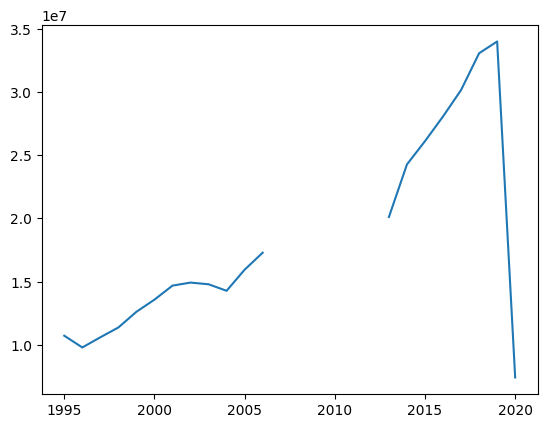

In [6]:
greece.plot()

As you can see, the the x-axis took as values the index of the series (years) and the y-axis the series values (inbound tourists to Greece). Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


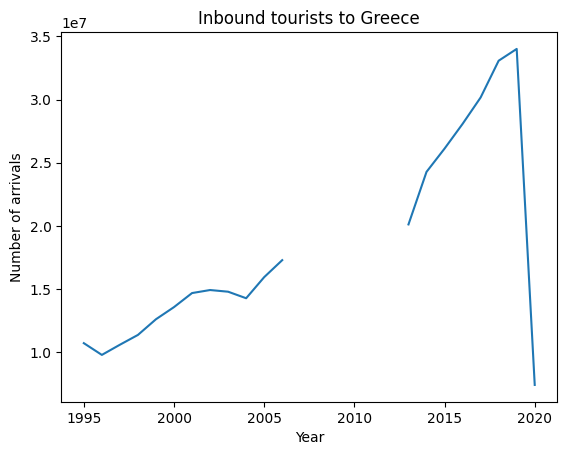

In [7]:
greece.plot(kind='line')

plt.title('Inbound tourists to Greece')
plt.ylabel('Number of arrivals')
plt.xlabel('Year')

plt.show()



Notice the dramatic drop in tourists in 2020. This can be attributed to the outbreak of the COVID-19 pandemic.
To highlight this in our plot we can annotate it with text using the `.text(x, y, text)` method. Parameters `x` and `y` are by default in data coordinates. Since the years in the series is of type 'string', we need to specify x using the corresponding position of the year.

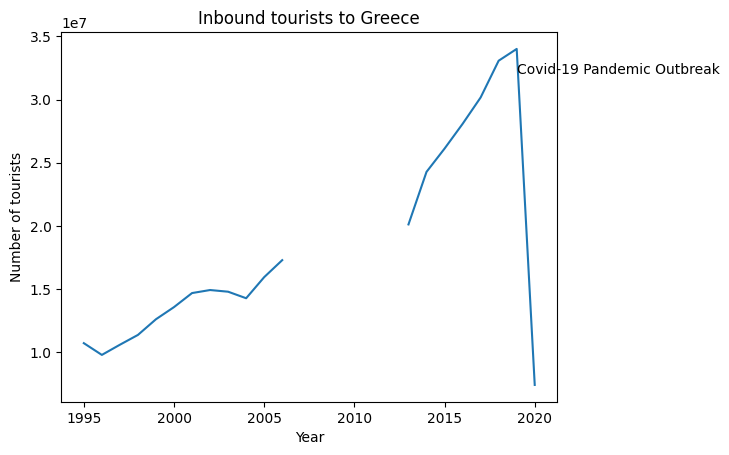

In [8]:
greece.plot(kind='line')

plt.title('Inbound tourists to Greece')
plt.ylabel('Number of tourists')
plt.xlabel('Year')

plt.text(24, 32000000, 'Covid-19 Pandemic Outbreak')

plt.show() 

### Multiple Lines

Let's compare now the number of inbound tourists in Greece, Italy and France for years 2010 to 2021.
First, we need to retrieve the data for the required countries and years.


In [9]:
df_cmp = df_tourism.loc[['Greece', 'Italy', 'France'], '2010': '2020']
df_cmp

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,
Greece,NaN,NaN,NaN,20112000.0,24272000.0,26114000.0,28071000.0,30161000.0,3.307200e+07,34005000.0,7406000.0
Italy,73225000.0,75866000.0,76293000.0,76762000.0,77694000.0,81068000.0,84925000.0,89931000.0,9.322860e+07,95399000.0,38419000.0
France,189826000.0,196595000.0,197522000.0,204410000.0,206599000.0,203302000.0,203042000.0,207274000.0,2.119980e+08,217877000.0,117109000.0


Then we call `plot()` on the dataframe to plot it:


<Axes: xlabel='Country'>

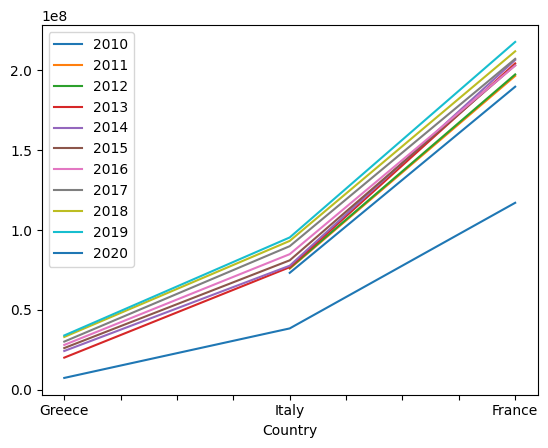

In [10]:
df_cmp.plot(kind='line')

😔

This is not the plot we wanted.
Matplotlib plots the index of a dataframe as the x-axis and the columns as lines on the y-axis.

In our first example with just the Greek data, we had a pandas Series with the years as index.
Here, however, we have a dataframe with the 3 countries as index and the years as columns.

To generate the right plot, we need to transpose the dataftame by calling the `transpose()` method to swap the row and columns.

In [11]:
df_cmp = df_cmp.transpose()
df_cmp.head()

Country,Greece,Italy,France
2010,NaN,73225000.0,189826000.0
2011,NaN,75866000.0,196595000.0
2012,NaN,76293000.0,197522000.0
2013,20112000.0,76762000.0,204410000.0
2014,24272000.0,77694000.0,206599000.0


Now, if we plot out dataframe:

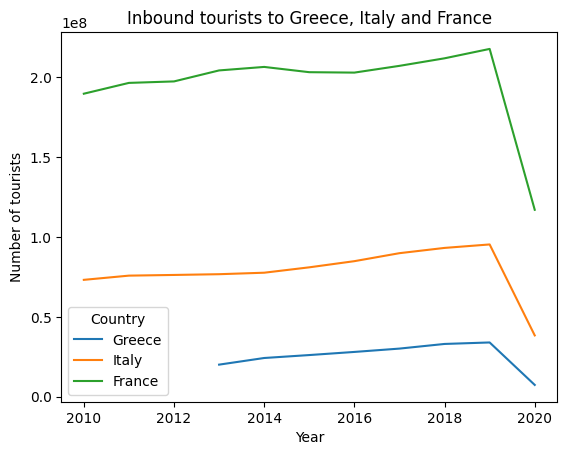

In [12]:
df_cmp.plot(kind='line')

plt.title('Inbound tourists to Greece, Italy and France')
plt.ylabel('Number of tourists')
plt.xlabel('Year')

# plt.legend().set_visible(True)

plt.show()

**Question 1:** Compare the inbound tourists for years 2010-2020, for the 5 countries with most inbound tourists in 2020.

Hint: Use the sort_values([fields], ascending=False, axis=0, inplace=True)


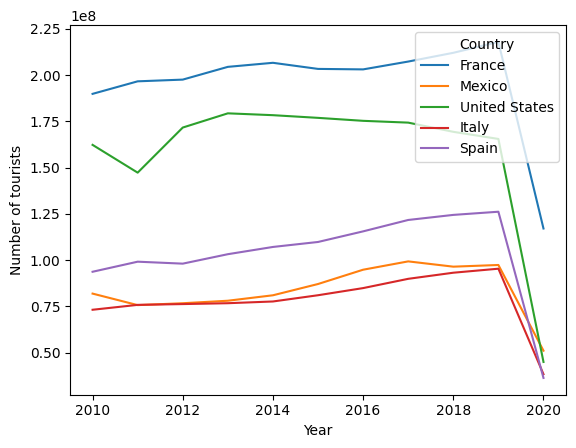

In [13]:
# type your solution
df_tourism.sort_values(['2020'], ascending=False, axis = 0, inplace=True)
df_top5 = df_tourism.head(5)
df_top5 = df_top5.loc[:, '2010':'2020'].transpose()
df_top5.plot(kind='line')

plt.ylabel('Number of tourists')
plt.xlabel('Year')
plt.show()

## Bar Charts

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

The bars can be plotted vertically or horizontally.  A vertical bar chart is sometimes called a column chart. One disadvantage of them is that they lack space for text labelling for each bar.

In matplotlib we can create a bar plot by setting the `kind` parameter:
- `kind=bar` vertical bar chart or column chart
- `kind=barh` horizontal bar chart


**Vertical bar chart**

Let's compare the  number of tourists in 2020 for Greece, Spain, France and Italy.


In [14]:
df_tourism_med = df_tourism.loc[['Greece', 'Italy', 'France', 'Spain'], '2020']
df_tourism_med

Country
Greece      7406000.0
Italy      38419000.0
France    117109000.0
Spain      36410000.0
Name: 2020, dtype: float64

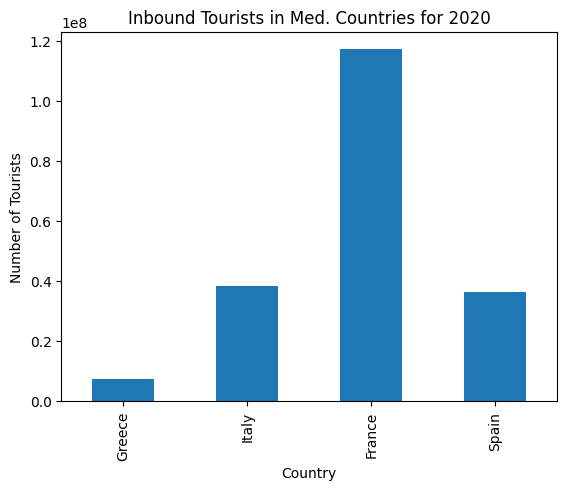

In [15]:
df_tourism_med.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Number of Tourists')
plt.title('Inbound Tourists in Med. Countries for 2020')

plt.show()

The bar plot above shows the total number of tourists for these countries in 2020.

To rotate the x-axis labels we can set the `rot` parameter:

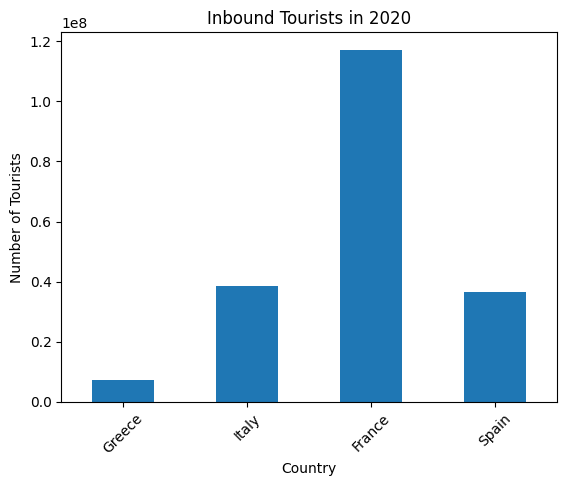

In [16]:
df_tourism_med.plot(kind='bar', rot=45)

plt.xlabel('Country')
plt.ylabel('Number of Tourists')
plt.title('Inbound Tourists in 2020')

plt.show()

**Horizontal Bar Plot**

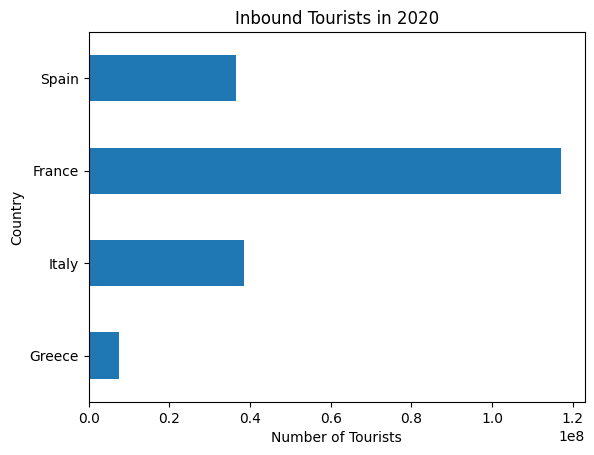

In [17]:
df_tourism_med.plot(kind='barh')

plt.ylabel('Country')
plt.xlabel('Number of Tourists')
plt.title('Inbound Tourists in 2020')

plt.show()

### Time Series
In the international tourism dataset, even though we have years as the xAxis, we need not handle them explicitly as datetime type. However, if our data include a date field, handling the corresponding values as datetime type is recommended as it enables time-based slicing, proper axis labeling, etc.


> #### Dataset: **[Stock Market Dataset](https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)** 
>This dataset includes historical daily prices and volumes of all U.S. stocks and ETFs, containing CSV files for every stock, with values for Date, Open, High, Low, Close, Volume, etc. For this lab, we will use the historical data for the Amazon stock.

Let's load the historical data for the Amazon stock. 

In [18]:
df_stock = pd.read_csv('amzn.csv')
df_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


Next, we set as index the Date column:

In [19]:
df_stock.set_index('Date', inplace=True)
df_stock

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0


To generate a line plot with the close prices:

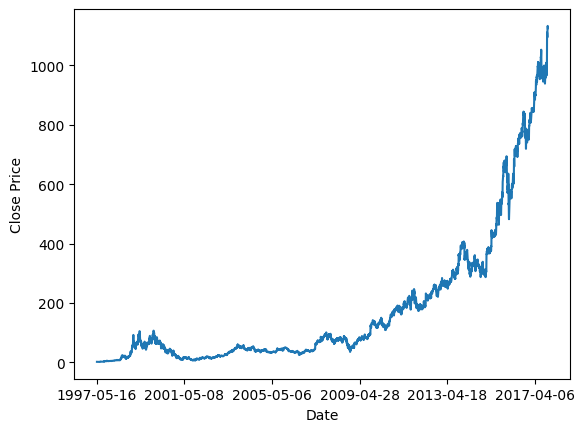

In [20]:
df_stock['Close'].plot()
plt.ylabel('Close Price')
plt.show()

To explicitly handle the xAxis values as datetimes, we can change the type of the index to datetime:

In [21]:
df_stock.index = pd.to_datetime(df_stock.index)
type(df_stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

Now, let's plot the time series again:

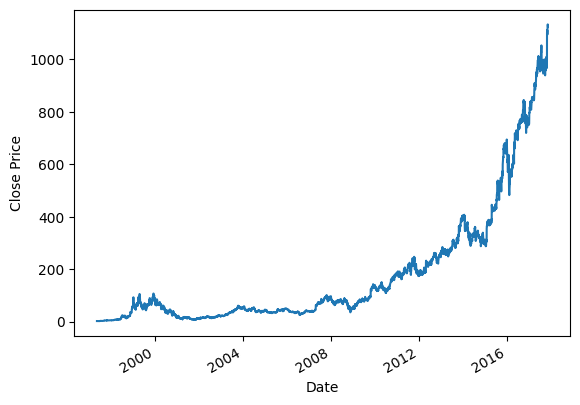

In [22]:
df_stock['Close'].plot()
plt.ylabel('Close Price')
plt.show()

What we did above, can be done faster by calling the `.read_csv()` method with `parse_dates=True` to ensure that dates are actually parsed as dates and not as strings, and with `index_col=0`, which sets the first column of the CSV data file (Date) to be the index.

In [23]:
df_stock = pd.read_csv('amzn.csv', index_col=0, parse_dates=True)
df_stock.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0


**Question 2:** Create a time series plot to visualize the daily Low and High prices in 2017.

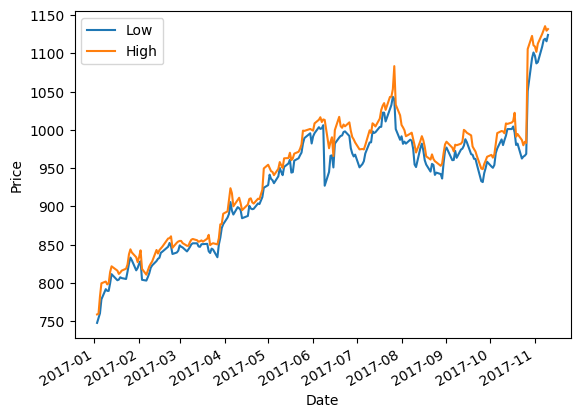

In [24]:
# type your solution
df_stock.loc['2017-01-01':'2017-12-31', ['Low', 'High']].plot()
plt.ylabel('Price')
plt.show()

Having explicitly set the index as datetime, we can also resample the data to a yearly frequency, calculating the average of close prices within each year:


In [25]:
yearly_avg_close = df_stock['Close'].resample('Y').mean()

yearly_avg_close

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_23994/4007242890.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_close = df_stock['Close'].resample('Y').mean()


Date
1997-12-31      3.133774
1998-12-31     15.661310
1999-12-31     68.913000
2000-12-31     46.533889
2001-12-31     12.200605
2002-12-31     16.501044
2003-12-31     37.741349
2004-12-31     43.565238
2005-12-31     39.897103
2006-12-31     35.909323
2007-12-31     67.225697
2008-12-31     69.885059
2009-12-31     87.281825
2010-12-31    139.140357
2011-12-31    196.672103
2012-12-31    220.305160
2013-12-31    298.032222
2014-12-31    332.550952
2015-12-31    478.138175
2016-12-31    699.525536
2017-12-31    938.705505
Freq: YE-DEC, Name: Close, dtype: float64

Now, we can visualize these yearly averages:

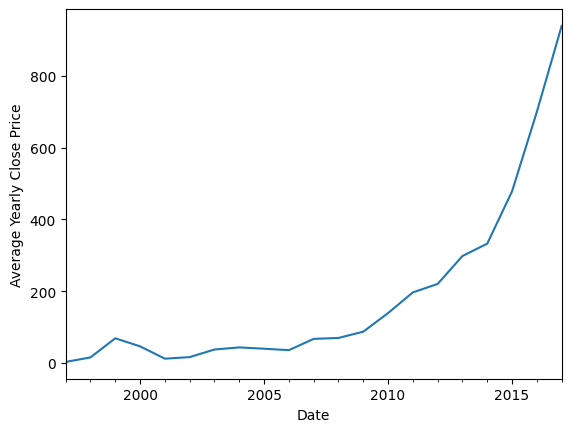

In [26]:
yearly_avg_close.plot(kind='line')
plt.ylabel('Average Yearly Close Price')


plt.show()

A bar chart may be preferable over a line chart for visualizing the average price per year and facilitating comparisons between years due to its ability to present discrete values and enable direct comparisons:

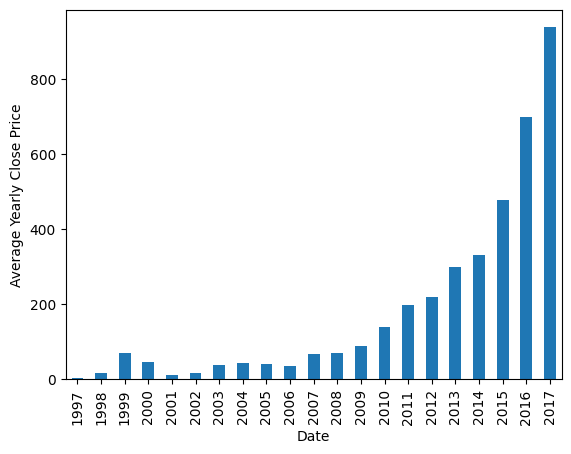

In [27]:
yearly_avg_close.plot(kind='bar')
plt.ylabel('Average Yearly Close Price')

# Modify x-tick labels
plt.gca().set_xticklabels([x.strftime('%Y') for x in yearly_avg_close.index])


plt.show()

## Area Plots


The **area plot** is a fairly common chart type. Most of the time, area plots are used as stacked area charts.
A stacked area chart is particularly useful when you want to understand both the individual trends of components and how these components contribute to the overall total.

Let's create a stacked area plot for Greece and Cyprus for years 2013-2019:


In [28]:
# transpose the dataframe
df_gr_cy = df_tourism.loc[['Greece', 'Cyprus'], '2013':'2019'].transpose()

df_gr_cy

Country,Greece,Cyprus
2013,20112000.0,2626000.0
2014,24272000.0,2558000.0
2015,26114000.0,2780000.0
2016,28071000.0,3286000.0
2017,30161000.0,3750000.0
2018,33072000.0,4024000.0
2019,34005000.0,4117000.0


Area plots are stacked by default. To produce a stacked area plot:

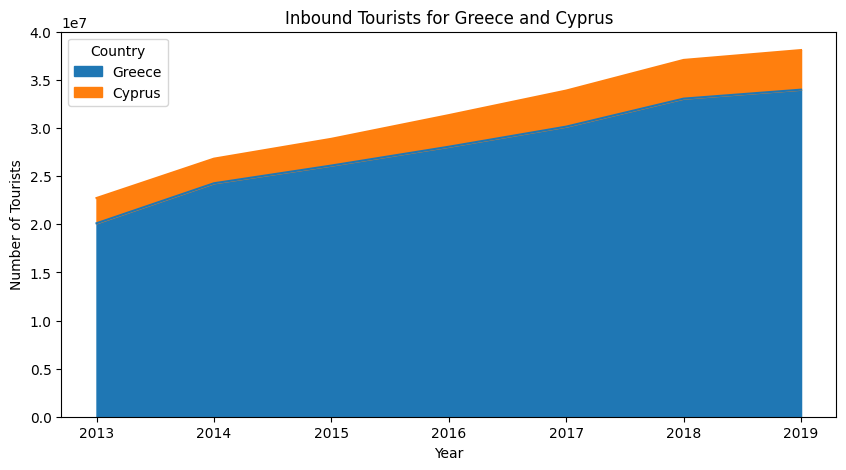

In [29]:
df_gr_cy.plot(kind='area',
             figsize=(10, 5))  # (x, y) size
plt.title('Inbound Tourists for Greece and Cyprus')
plt.ylabel('Number of Tourists')
plt.xlabel('Year')

plt.show()

To produce an unstacked plot, we set parameter `stacked` to value `False`.  Unstacked plots are useful for comparing multiple components independently, highlighting their individual trends without the visual overlap of stacked plots.

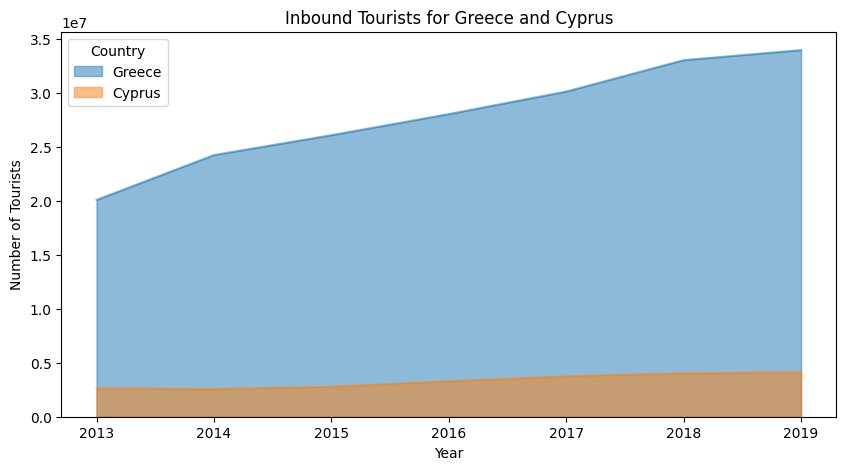

In [30]:
df_gr_cy.plot(kind='area',
             stacked=False,
             figsize=(10, 5))  # (x, y) size

plt.title('Inbound Tourists for Greece and Cyprus')
plt.ylabel('Number of Tourists')
plt.xlabel('Year')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.


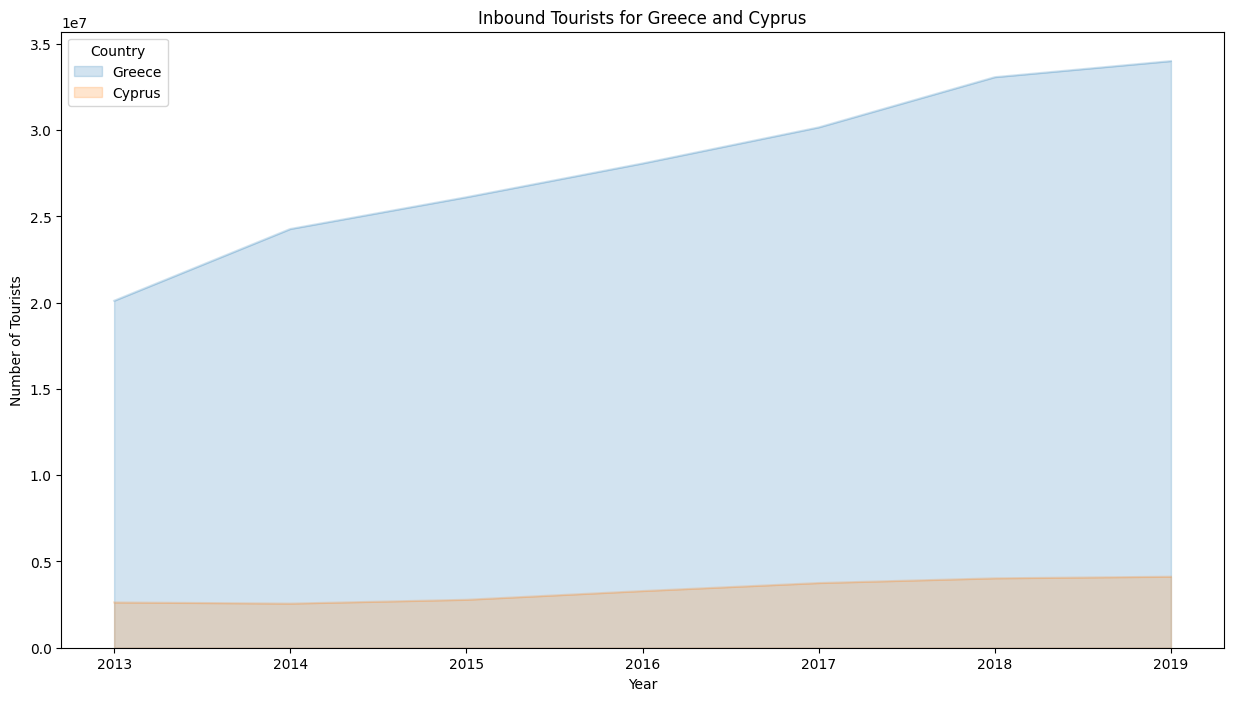

In [31]:
df_gr_cy.plot(kind='area', 
             alpha=0.2,
             stacked=False,
             figsize=(15, 8))

plt.title('Inbound Tourists for Greece and Cyprus')
plt.ylabel('Number of Tourists')
plt.xlabel('Year')

plt.show()

## Histograms

A histogram is the most commonly used graph to show the frequency distribution of a dataset, i.e. how often each different value occurs in the dataset. A histogram partitions its x-axis into bins, with the y-value of every bin being the number of data points that correspond to it.

We will use a subset of TripAdvisor Restaurants dataset. Specifically, we will use a subset that contains restaurants in Greece.

Let's import the data:

In [32]:
df_restaurants = pd.read_csv('tripadvisor_restaurants_greece.csv')
df_restaurants

,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,O Andreas,"[""Europe"", ""Greece"", ""Northeast Aegean Islands...",Greece,Northeast Aegean Islands,Thasos,Kallirachi,Kallirachi Greece,NaN,NaN,Unclaimed,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Yogart,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"13 Sekeri, Tolon 210 56 Greece",37.520878,22.859404,Claimed,...,26.0,0.0,1.0,1.0,0.0,5.0,5.0,4.5,NaN,NaN
2,Thalassa Tavern,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"14 Atkis st, Tolon 210 56 Greece",37.520290,22.859080,Unclaimed,...,5.0,3.0,0.0,0.0,2.0,4.0,4.5,4.0,NaN,NaN
3,Bob's Snack Cafe,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"Sekeri 59, Tolon 21056 Greece",37.517820,22.858550,Claimed,...,10.0,8.0,3.0,0.0,0.0,4.0,4.0,4.0,NaN,NaN
4,Ormos,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"Aktis 8, Tolon 21056 Greece",37.520450,22.859852,Claimed,...,21.0,2.0,1.0,0.0,0.0,4.5,5.0,4.5,NaN,"fresh fish, seafood, big portions, visited thi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33758,Το Giasemi,"[""Europe"", ""Greece"", ""Crete"", ""Heraklion Prefe...",Greece,Crete,Heraklion Prefecture,Fodele,"Fodele, Crete 71500 Greece",35.381607,24.957891,Unclaimed,...,15.0,2.0,0.0,0.0,0.0,5.0,5.0,5.0,NaN,NaN
33759,Virage Café & Bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"Kalamaki, Chania Town, Crete 73100 Greece",35.512974,23.967583,Claimed,...,17.0,2.0,5.0,2.0,2.0,4.5,4.5,4.5,NaN,NaN
33760,Salavantes - Garden Restaurant & bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"5th km Chania-Kissamos old road, Kalamaki, Cha...",35.512150,23.966623,Claimed,...,91.0,15.0,2.0,0.0,1.0,4.5,5.0,4.5,NaN,"salmon, seafood, friendly staff and delicious ..."
33761,Kalamaki Restaurant Beach Bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"PEO Kissamou Chanion Kalamaki Beach, Kalamaki,...",35.513256,23.969404,Claimed,...,85.0,62.0,29.0,6.0,8.0,4.0,4.5,4.0,4.0,"sea bream, filet, tzatziki, burger, great plac..."


Let's create a histogram for the average restaurant rating. We can easily graph this distribution by passing `kind=hist` to `plot()`.

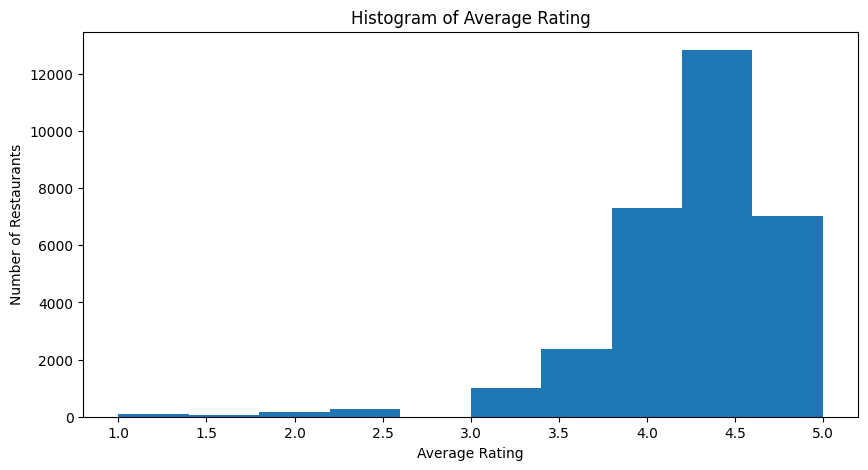

In [33]:
df_restaurants['avg_rating'].plot(kind='hist', figsize=(10, 5))

plt.title('Histogram of Average Rating')
plt.ylabel('Number of Restaurants')
plt.xlabel('Average Rating')

plt.show()

The x-axis of this histogram denotes the average rating intervals, while the y-axis represents the count of restaurants falling within each bin.

Using **Numpy**'s `histogram` method, we can get the bin ranges and corresponding counts:


In [34]:
counts, bin_ranges = np.histogram(df_restaurants['avg_rating'].dropna())

print(counts) # frequency count
print(bin_ranges) # bin ranges, default = 10 bins

[   87    55   160   264     0  1010  2372  7324 12838  7031]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5. ]


By default, the `histogram` method creates 10 bins.


Using the bin_ranges we just calculated, we can make the x-axis labels match the bin size:


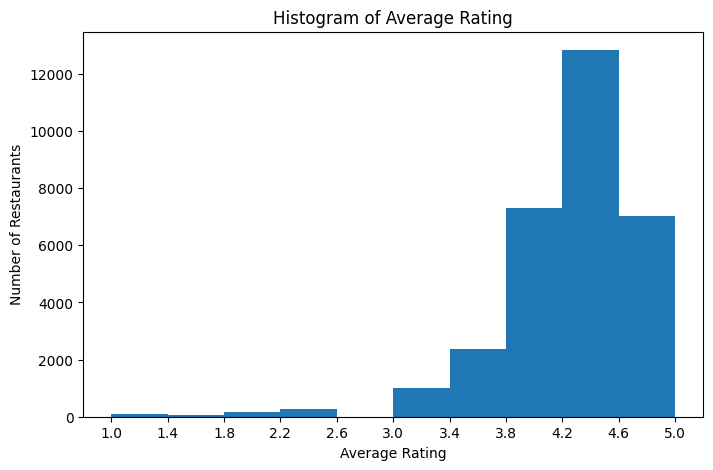

In [35]:
df_restaurants['avg_rating'].plot(kind='hist', figsize=(8, 5), xticks=bin_ranges)

plt.title('Histogram of Average Rating')
plt.ylabel('Number of Restaurants')
plt.xlabel('Average Rating')
plt.show()

## Pie Charts

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword. This visualization is particularly useful for showing the relative contributions of different categories to a whole.

We will use a subset of TripAdvisor Restaurants dataset for creating pie charts.


Let's import the data:

In [36]:
df_restaurants = pd.read_csv('tripadvisor_restaurants_greece.csv')
df_restaurants

,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,O Andreas,"[""Europe"", ""Greece"", ""Northeast Aegean Islands...",Greece,Northeast Aegean Islands,Thasos,Kallirachi,Kallirachi Greece,NaN,NaN,Unclaimed,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Yogart,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"13 Sekeri, Tolon 210 56 Greece",37.520878,22.859404,Claimed,...,26.0,0.0,1.0,1.0,0.0,5.0,5.0,4.5,NaN,NaN
2,Thalassa Tavern,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"14 Atkis st, Tolon 210 56 Greece",37.520290,22.859080,Unclaimed,...,5.0,3.0,0.0,0.0,2.0,4.0,4.5,4.0,NaN,NaN
3,Bob's Snack Cafe,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"Sekeri 59, Tolon 21056 Greece",37.517820,22.858550,Claimed,...,10.0,8.0,3.0,0.0,0.0,4.0,4.0,4.0,NaN,NaN
4,Ormos,"[""Europe"", ""Greece"", ""Peloponnese"", ""Argolis R...",Greece,Peloponnese,Argolis Region,Tolon,"Aktis 8, Tolon 21056 Greece",37.520450,22.859852,Claimed,...,21.0,2.0,1.0,0.0,0.0,4.5,5.0,4.5,NaN,"fresh fish, seafood, big portions, visited thi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33758,Το Giasemi,"[""Europe"", ""Greece"", ""Crete"", ""Heraklion Prefe...",Greece,Crete,Heraklion Prefecture,Fodele,"Fodele, Crete 71500 Greece",35.381607,24.957891,Unclaimed,...,15.0,2.0,0.0,0.0,0.0,5.0,5.0,5.0,NaN,NaN
33759,Virage Café & Bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"Kalamaki, Chania Town, Crete 73100 Greece",35.512974,23.967583,Claimed,...,17.0,2.0,5.0,2.0,2.0,4.5,4.5,4.5,NaN,NaN
33760,Salavantes - Garden Restaurant & bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"5th km Chania-Kissamos old road, Kalamaki, Cha...",35.512150,23.966623,Claimed,...,91.0,15.0,2.0,0.0,1.0,4.5,5.0,4.5,NaN,"salmon, seafood, friendly staff and delicious ..."
33761,Kalamaki Restaurant Beach Bar,"[""Europe"", ""Greece"", ""Crete"", ""Chania Prefectu...",Greece,Crete,Chania Prefecture,Kalamaki,"PEO Kissamou Chanion Kalamaki Beach, Kalamaki,...",35.513256,23.969404,Claimed,...,85.0,62.0,29.0,6.0,8.0,4.0,4.5,4.0,4.0,"sea bream, filet, tzatziki, burger, great plac..."


Let's focus on the 'region' column. This takes the following values, corresponding to regions in Greece:

In [37]:
df_restaurants.region.unique()

array(['Northeast Aegean Islands', 'Peloponnese', 'Crete', 'South Aegean',
       'Attica', 'Central Macedonia', 'West Greece', 'Epirus', 'Thessaly',
       'Ionian Islands', 'Central Greece', 'Sporades',
       'East Macedonia and Thrace', 'West Macedonia', nan], dtype=object)

To create a pie chart to visualize the percentage of restaurants grouped by region, we need to use the *pandas* `groupby` method to summarize the restaurant data by `region`. The `groupby` method first splits the data into groups based on the values of some fields, and then applies an aggregate function to each group, before combining the results.

In [38]:
# group restaurants by region and get the size of every group
region_counts = df_restaurants.groupby('region').size()

region_counts

region
Attica                       7391
Central Greece               1113
Central Macedonia            3624
Crete                        4329
East Macedonia and Thrace     757
Epirus                        954
Ionian Islands               3300
Northeast Aegean Islands     1511
Peloponnese                  2073
South Aegean                 5838
Sporades                      505
Thessaly                     1152
West Greece                   929
West Macedonia                285
dtype: int64

Next, to generate the pie chart, we set `kind = 'pie'`.

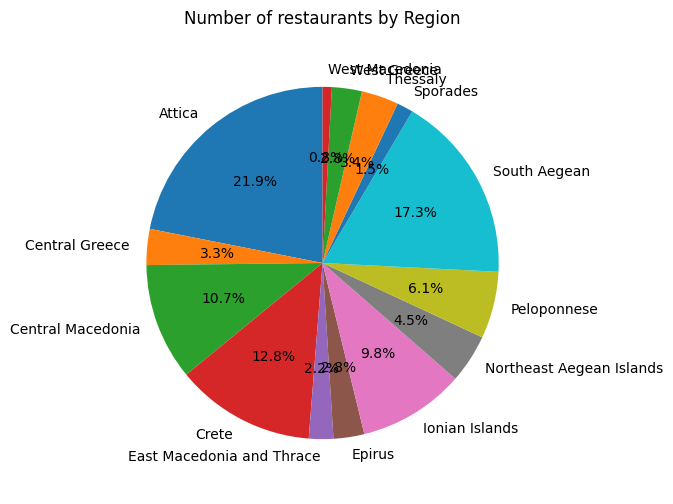

In [39]:
# autopct create %, start angle represent starting point
region_counts.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # label the wedges in percentages 
                            startangle=90,     # start angle 90°
                            )

plt.title('Number of restaurants by Region')
plt.axis('equal') # Sets the pie chart aspect ratio to look like a circle.
plt.ylabel("")
plt.show()


The pie chart is not very clear, with some text overlapping. We can remove the labels and add a legend instead. We can also move the values of every segment outside it. Also to highlight some segemnts we can make them stand out using the `explode` parameter.


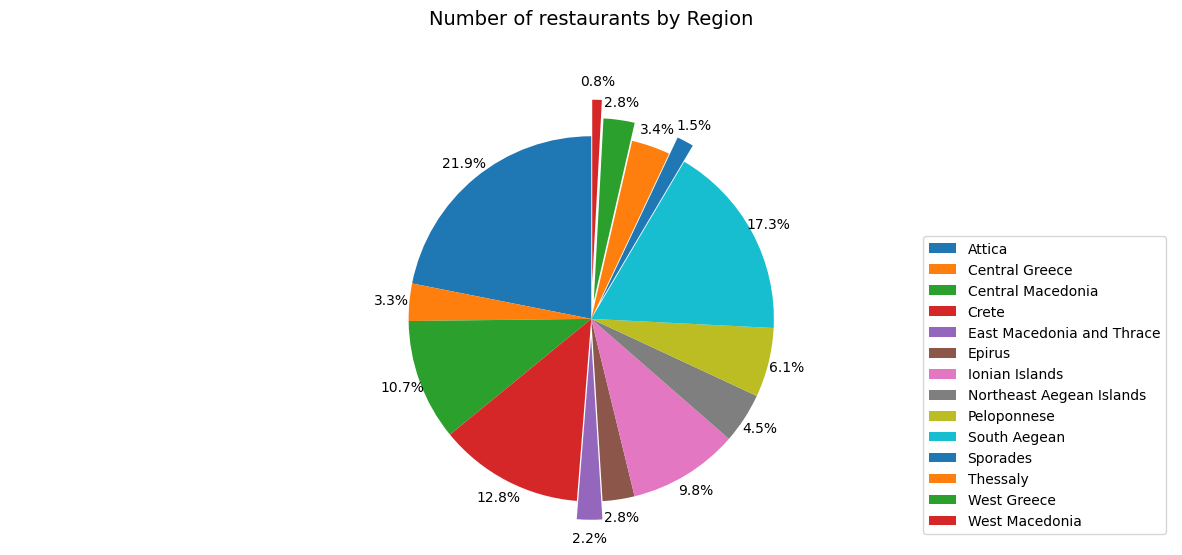

In [40]:
explode_list = [0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0.2] # ratio for each region with which to offset each pie segment.

region_counts.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # hide labels
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of its text
                            explode=explode_list # 'explode' lowest 4 countries
                            )

plt.title('Number of restaurants by Region', y=1.1, fontsize= 14)

plt.axis('equal') 

plt.ylabel("")

# add legend
plt.legend(labels=region_counts.index, loc='lower right') 

plt.show()

**Question 3:** Create a pie plot to visualize the percentage of restaurants per province in Crete.

*Hint: Filter first the restaurants for Crete (region = Crete) and then count by province.*



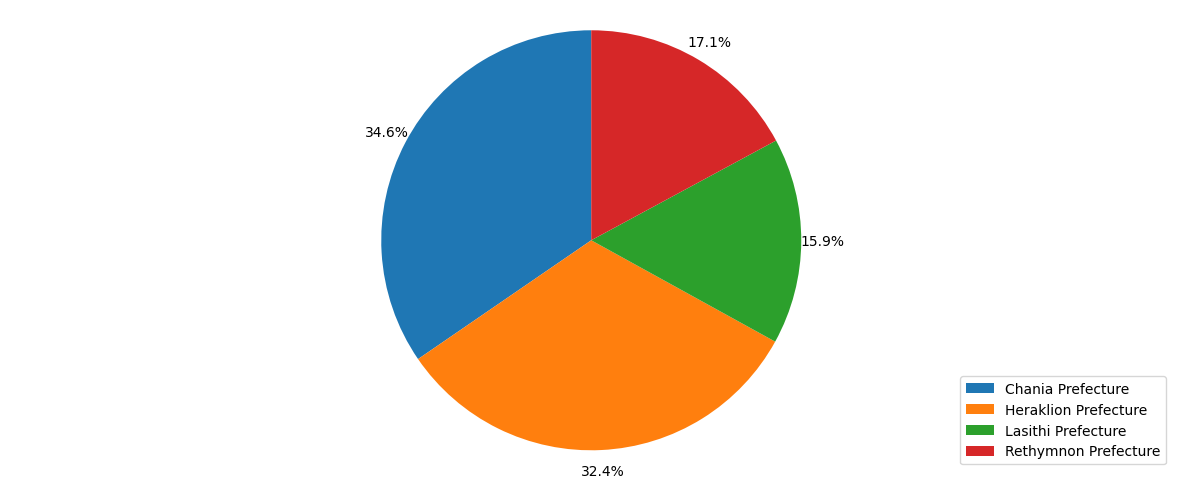

In [41]:
# type your solution
cretan_restaurants_counts = df_restaurants[df_restaurants['region'] == 'Crete'].groupby('province').size()

cretan_restaurants_counts.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # hide labels
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of its text
                            )

plt.axis('equal') 

plt.ylabel("")

# add legend
plt.legend(labels=cretan_restaurants_counts.index, loc='lower right') 

plt.show()

## Scatter Plots

A scatter plot is a type of plot used to compare variables within a dataset. The data are displayed as a collection of points, with the value of one variable determining the position on the horizontal axis and the value of another variable determining the position on the vertical axis. This plot is particularly useful for visualizing and identifying relationships, trends, and potential correlations between variables.

Let's create a scatter plot to visualize the relationship between the open price of the Amazon stock and its daily volume.
For this, we need to set `kind='scatter'` and set the `x` and `y` parameters to specify the columns that go on the x and y-axis, respectively.



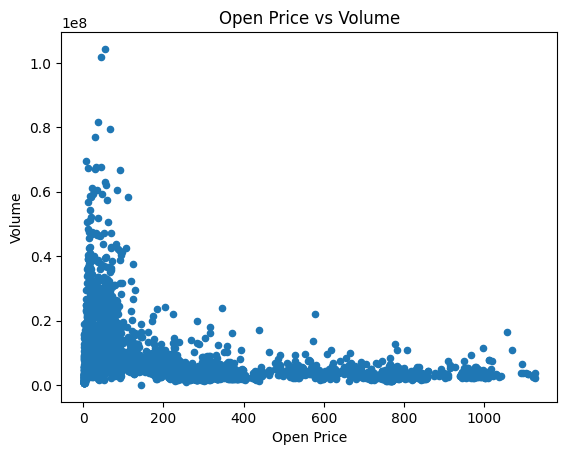

In [42]:
df_stock.plot(kind='scatter', x='Open', y='Volume')

plt.title('Open Price vs Volume')
plt.xlabel('Open Price')
plt.ylabel('Volume')

plt.show()

Every point on the scatterplot corresponds to a single day. Note that some points overlap.

From the plot, we can easily observe that, in general, when the Open price is lower there is a higher volume. We can mathematically model this relationship using a regression line (line of best fit).


For this, we'll use **Numpy**'s `polyfit()` method by passing in the following:

In [43]:
from numpy.polynomial import Polynomial

x = df_stock['Open']      
y = df_stock['Volume']

# Degree of polynomial: 1 = linear, 2 = quadratic, ...
polynomial = Polynomial.fit(x, y, deg=1)

# The fitted polynomial
print(polynomial)

4205080.32811349 - 5346946.87524029·x


To plot the regression line on the scatter plot:


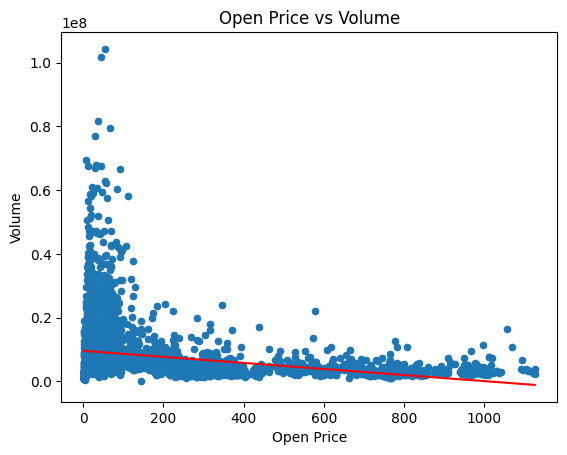

In [44]:
df_stock.plot(kind='scatter', x='Open', y='Volume')

plt.title('Open Price vs Volume')
plt.xlabel('Open Price')
plt.ylabel('Volume')

# plot regression line
plt.plot(x, polynomial(x), color='red')


plt.show()

## Box Plots

A box plot visually summarizes the distribution of numerical data by displaying the quartiles, median, and any outliers. It provides a concise representation of the data’s spread, central tendency, and variability. This type of plot is particularly useful for identifying outliers and comparing distributions across different groups.

The chart is a standardized way of displaying the distribution of data based on a five-number summary:

**Minimum Value:** The end of the lower whisker represents the smallest data point, excluding any outliers.

**First Quartile (Q1):** The lower edge of the box indicates the 25th percentile, meaning 25% of data points fall below this value.

**Median (Second Quartile, Q2):** The line within the box marks the median of the dataset.

**Third Quartile (Q3):** The upper edge of the box shows the 75th percentile, with 75% of data points lying below this value.

**Maximum Value:** The end of the upper whisker indicates the largest data point, excluding outliers.

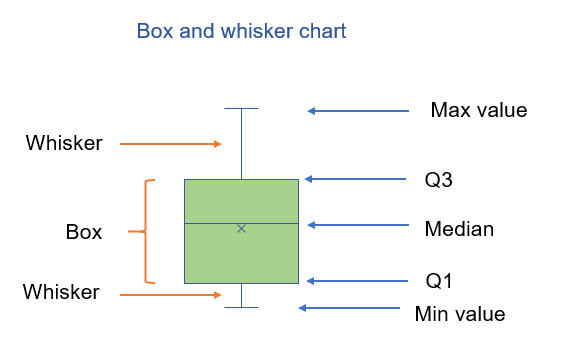


We can make a `boxplot` setting `kind=box` in the `plot`. 

Let's generate a box plot for inbound tourism in Greece.

In [45]:
greece = df_tourism.loc['Greece']

greece

1995    10712000.0
1996     9782000.0
1997    10588000.0
1998    11364000.0
1999    12606000.0
2000    13567000.0
2001    14678000.0
2002    14918000.0
2003    14785000.0
2004    14268000.0
2005    15938000.0
2006    17284000.0
2007           NaN
2008           NaN
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013    20112000.0
2014    24272000.0
2015    26114000.0
2016    28071000.0
2017    30161000.0
2018    33072000.0
2019    34005000.0
2020     7406000.0
Name: Greece, dtype: float64

Plot by passing in `kind='box'`.


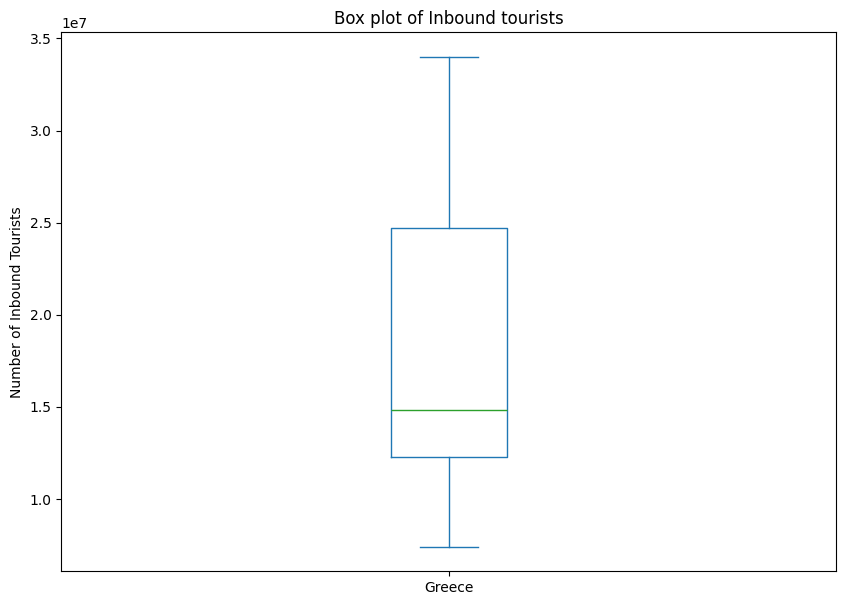

In [46]:
greece.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Inbound tourists')
plt.ylabel('Number of Inbound Tourists')

plt.show()

Using the `describe()` method, we can get the actual numbers:

In [47]:
greece.describe()

count    2.000000e+01
mean     1.818515e+07
std      8.181357e+06
min      7.406000e+06
25%      1.229550e+07
50%      1.485150e+07
75%      2.473250e+07
max      3.400500e+07
Name: Greece, dtype: float64

**Question 4:** Create a box plot to compare the distribution of inbound tourists between Greece, Italy, France and Spain.


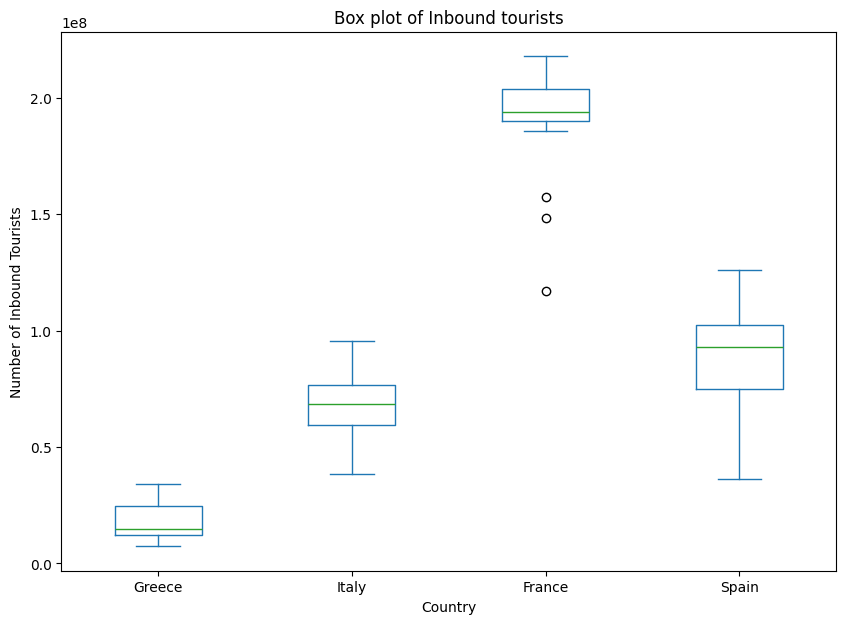

In [48]:
# type your solution
df_cmp = df_tourism.loc[['Greece', 'Italy', 'France', 'Spain']].transpose()
df_cmp.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Inbound tourists')
plt.ylabel('Number of Inbound Tourists')
plt.xlabel('Country')

plt.show()

## Matplotlib Subplots

In Matplotlib, we can create multiple plots within the same figure using the `plt.subplots(nrows, ncols)` function, which returns a tuple containing a `figure` and an array of `axes`. The `figure` represents the entire plotting area with `nrows` rows and `ncols` columns of individual plots. To plot data on a specific subplot, we pass the appropriate `axes` object to the `ax` parameter of the `df.plot()` method, using `axes[index]` to reference the subplot location. Creating multiple plots in the same figure allows for side-by-side comparisons of different datasets or variables and for analyzing various plot types of the same data within a single visual context.

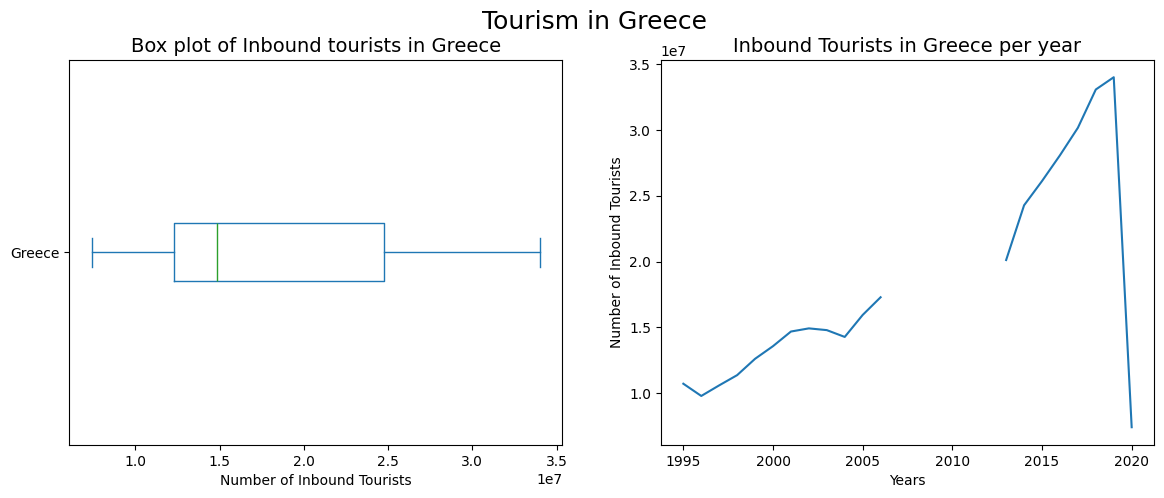

In [49]:
figure, axes = plt.subplots(1, 2)


figure.suptitle("Tourism in Greece", fontsize=18)

# Box plot
greece.plot(kind='box', vert=False, figsize=(14, 5), ax=axes[0])
axes[0].set_title('Box plot of Inbound tourists in Greece', fontsize=14)
axes[0].set_xlabel('Number of Inbound Tourists')


# Line plot
greece.plot(kind='line', figsize=(14, 5), ax=axes[1]) # add to subplot 2
axes[1].set_title ('Inbound Tourists in Greece per year', fontsize=14)
axes[1].set_ylabel('Number of Inbound Tourists')
axes[1].set_xlabel('Years')
plt.show()

**Question 5:** Create a figure with two subplots:

1. A bar chart to visualize the total inbound tourists for periods `2006-2010`, `2011-2015`, `2016-2020` for France, Italy and Spain.
2. A box plot to visualize the distribution for these countries for years `2006 - 2020`.

In [50]:
# type your solution
years_06_10 = [str(year) for year in range(2006, 2011)]
years_11_15 = [str(year) for year in range(2011, 2016)]
years_16_20 = [str(year) for year in range(2016, 2021)]


df_06_10 = df_tourism.loc[['France', 'Italy', 'Spain'], years_06_10].sum(axis=1)
df_11_15 = df_tourism.loc[['France', 'Italy', 'Spain'], years_11_15].sum(axis=1)
df_16_20 = df_tourism.loc[['France', 'Italy', 'Spain'], years_16_20].sum(axis=1)

new_df = pd.DataFrame({'2006-2010': df_06_10, 
                       '2011-2015': df_11_15,
                       '2016-2020': df_16_20})
new_df

,2006-2010,2011-2015,2016-2020
Country,,,
France,962967000.0,1.008428e+09,9.573000e+08
Italy,352260000.0,3.876830e+08,4.019026e+08
Spain,478372000.0,5.175240e+08,5.243140e+08


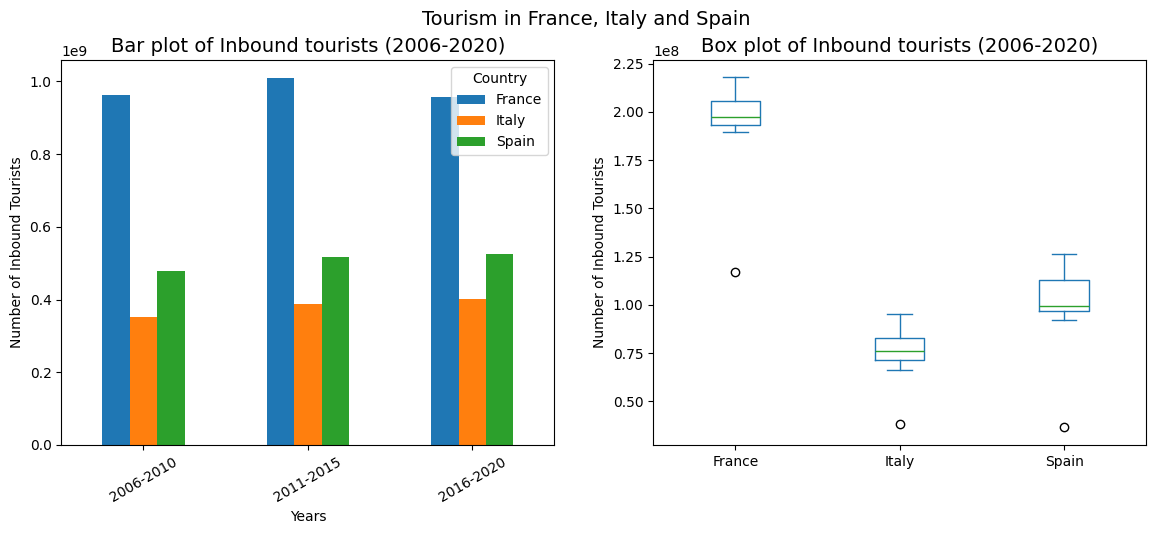

In [51]:
figure, axes = plt.subplots(1, 2)
figure.suptitle("Tourism in France, Italy and Spain", fontsize=14)

# Bar plot
df_bar = new_df.transpose().plot(kind='bar', figsize=(14, 5), ax=axes[0], rot=30)
axes[0].set_title('Bar plot of Inbound tourists (2006-2020)', fontsize=14)
axes[0].set_ylabel('Number of Inbound Tourists')
axes[0].set_xlabel('Years')


# Box plots
df_box = df_tourism.loc[['France', 'Italy', 'Spain'], "2006" : "2020"].transpose()
df_box.plot(kind='box', figsize=(14, 5), ax=axes[1])
axes[1].set_title('Box plot of Inbound tourists (2006-2020)', fontsize=14)
axes[1].set_ylabel('Number of Inbound Tourists')

plt.show()

**Question 6:** Generate a bar chart to visualize the top 20 cuisines in Athens:

In [55]:
# type your solution
df_restaurants = pd.read_csv('tripadvisor_restaurants_greece.csv')
athens_restaurants = df_restaurants[(df_restaurants['city'] == 'Athens') & (df_restaurants['cuisines'].notna())]
athens_restaurants

,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
7092,Laika Bar-Resto,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"30 Pellis, Athens 104 47 Greece",37.982970,23.711530,Claimed,...,13.0,0.0,1.0,1.0,0.0,5.0,4.5,4.5,NaN,NaN
7093,Nuovo Alfisti Espresso Bar,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"1-3 Drakou, Athens 117 42 Greece",37.964680,23.726791,Claimed,...,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7094,Stoa Proia,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"39 Panepistimiou, Athens 105 64 Greece",37.980614,23.732487,Unclaimed,...,1.0,0.0,0.0,0.0,0.0,4.5,4.0,5.0,NaN,NaN
7095,Enjoy Just Falafel,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"Aristotelous 98 Victoria Square, Athens 104 34...",37.994255,23.729382,Claimed,...,116.0,2.0,0.0,2.0,0.0,5.0,5.0,5.0,NaN,"falafel, small menu, super tasty, tasty food, ..."
7096,Taverna To Mavreli,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"1 Pramadon Platia Filopappou, Athens 117 41 Gr...",37.964850,23.715063,Unclaimed,...,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,Terra Delicia,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"59 Leoforos Georgiou Papandreou Goudi, Zografo...",37.982243,23.769420,Claimed,...,5.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,NaN,NaN
10001,Nikkei,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"Ksanthipou 10 & Dinokratous 1, Athens 106 74 G...",37.979076,23.742205,Claimed,...,71.0,22.0,9.0,2.0,12.0,4.0,4.0,3.5,NaN,"ceviche, causa, manchego cheese, smoked chicke..."
10002,Acropolis Ami Roof Garden,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,10 Iras BEST WESTERN Acropolis Ami Boutique Ho...,37.964554,23.730417,Claimed,...,12.0,1.0,3.0,2.0,2.0,3.5,4.0,3.0,NaN,NaN
10003,Indian Haveli,"[""Europe"", ""Greece"", ""Attica"", ""Athens""]",Greece,Attica,NaN,Athens,"Leof. Andrea Siggrou 12, Athens 117 42 Greece",37.968480,23.731436,Claimed,...,1501.0,121.0,33.0,13.0,7.0,4.5,4.5,4.5,NaN,"butter chicken, paneer, gulab jamun, mango, curry"


In [58]:
athens_restaurants['cuisines'].unique()
cuisines = athens_restaurants['cuisines'].str.split(', ').explode()
cuisines = cuisines.str.strip()

In [60]:
cuisines

7092     Mediterranean
7092             Greek
7093              Cafe
7094             Greek
7095          Lebanese
             ...      
10002         European
10003           Indian
10003            Asian
10003          Healthy
10004            Greek
Name: cuisines, Length: 6035, dtype: object

In [61]:
cuisine_counts = cuisines.value_counts()

In [63]:
cuisine_counts = cuisine_counts.head(20)

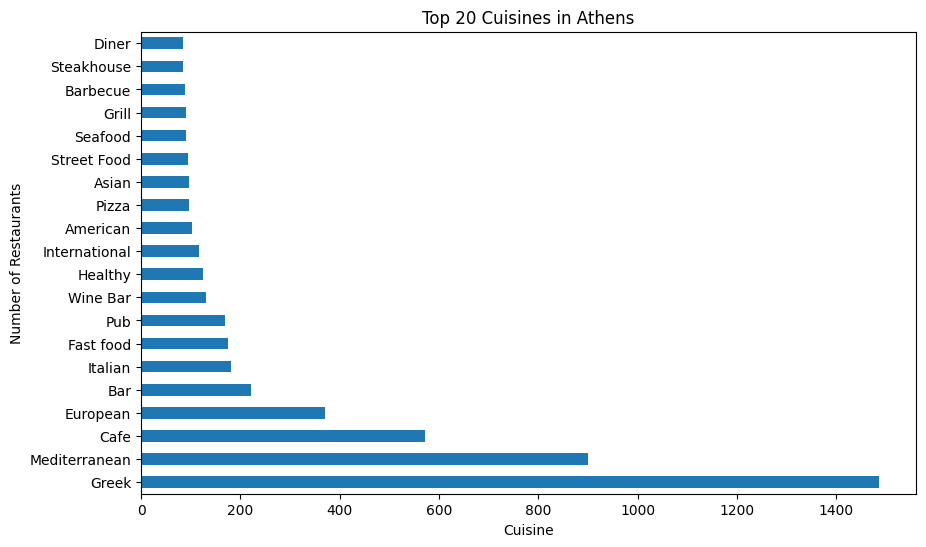

In [64]:
cuisine_counts.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 Cuisines in Athens')

plt.show()